<a href="https://colab.research.google.com/github/RashminiA6/UMBC-DATA606-Capstone/blob/main/rashmini_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from PIL import Image
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd


In [ ]:
!ls

In [ ]:
# Unzip the dataset
with ZipFile("/content/drive/MyDrive/plantvillage.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
!ls

 drive	'plantvillage dataset'	 sample_data


In [ ]:
print(os.listdir('plantvillage dataset'))

['segmented', 'color', 'grayscale']


plantvillage_dataset directory contains three folders: color, grayscale, and segmented.

**color**: Contains RGB color images.

**grayscale**: Contains black-and-white versions of the images.

**segmented**: Contains images with segmented plant parts.


In [ ]:
# Set the path to dataset directory
path_segmented = "plantvillage dataset/segmented"
path_color = "plantvillage dataset/color"
path_grayscale = "plantvillage dataset/grayscale"

# List all folders
folder_segemented = os.listdir(path_segmented)
folder_color = os.listdir(path_color)
folder_grayscale = os.listdir(path_grayscale)

# Print the total number of folders
print(len(folder_segemented))

print(len(folder_color))

print(len(folder_grayscale))

38
38
38


Each folder has 38 categories of different plant leaf varieties (diseased and healthy)




In [ ]:
# Print each folder name
for folder in folder_color:
    print(folder)

Pepper,_bell___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Orange___Haunglongbing_(Citrus_greening)
Tomato___Bacterial_spot
Grape___Esca_(Black_Measles)
Apple___Black_rot
Tomato___healthy
Peach___Bacterial_spot
Tomato___Tomato_mosaic_virus
Cherry_(including_sour)___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Cherry_(including_sour)___Powdery_mildew
Blueberry___healthy
Potato___Late_blight
Tomato___Spider_mites Two-spotted_spider_mite
Raspberry___healthy
Peach___healthy
Soybean___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Squash___Powdery_mildew
Potato___Early_blight
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___Common_rust_
Grape___Black_rot
Pepper,_bell___Bacterial_spot
Grape___healthy
Tomato___Septoria_leaf_spot
Tomato___Late_blight
Tomato___Target_Spot
Apple___Cedar_apple_rust
Apple___healthy
Apple___Apple_scab
Strawberry___Leaf_scorch
Tomato___Leaf_Mold
Potato___healthy
Tomato___Early_blight
Strawberry___healthy
Corn_(maize)___healthy


In [ ]:
for folder in folder_color:
    folder_path = os.path.join(path_color, folder)
    if os.path.isdir(folder_path):
        # List all files in the folder and count them
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        print(f"{folder}: {len(image_files)} images")

Pepper,_bell___healthy: 1478 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513 images
Orange___Haunglongbing_(Citrus_greening): 5507 images
Tomato___Bacterial_spot: 2127 images
Grape___Esca_(Black_Measles): 1383 images
Apple___Black_rot: 621 images
Tomato___healthy: 1591 images
Peach___Bacterial_spot: 2297 images
Tomato___Tomato_mosaic_virus: 373 images
Cherry_(including_sour)___healthy: 854 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
Cherry_(including_sour)___Powdery_mildew: 1052 images
Blueberry___healthy: 1502 images
Potato___Late_blight: 1000 images
Tomato___Spider_mites Two-spotted_spider_mite: 1676 images
Raspberry___healthy: 371 images
Peach___healthy: 360 images
Soybean___healthy: 5090 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 images
Squash___Powdery_mildew: 1835 images
Potato___Early_blight: 1000 images
Corn_(maize)___Northern_Leaf_Blight: 985 images
Corn_(maize)___Common_rust_: 1192 images
Grape___Black_rot: 1180 images
Pepper,_bell__

Total categories (diseases + healthy): 38
Categories: ['Pepper,_bell___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Apple___Black_rot', 'Tomato___healthy', 'Peach___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Cherry_(including_sour)___Powdery_mildew', 'Blueberry___healthy', 'Potato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Raspberry___healthy', 'Peach___healthy', 'Soybean___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Squash___Powdery_mildew', 'Potato___Early_blight', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Common_rust_', 'Grape___Black_rot', 'Pepper,_bell___Bacterial_spot', 'Grape___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Apple___Apple

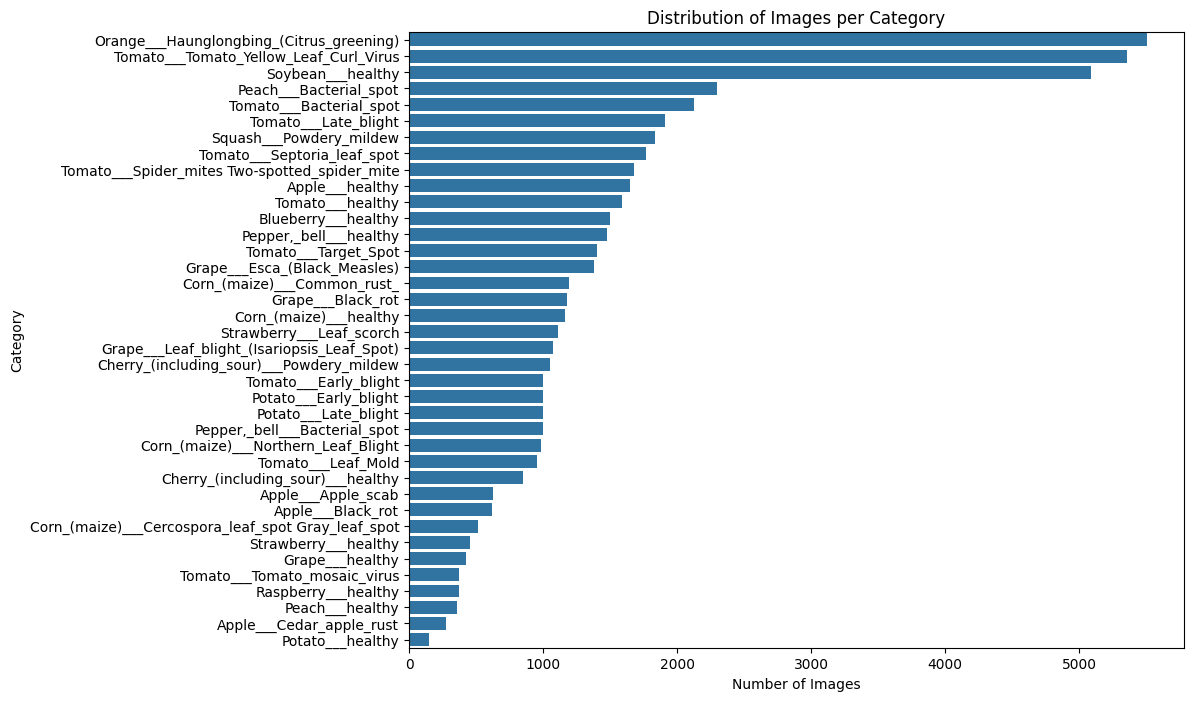

In [ ]:

# List all subdirectories (these represent classes)
categories = os.listdir(path_color)

# Basic dataset exploration
print(f"Total categories (diseases + healthy): {len(categories)}")
print(f"Categories: {categories}")

# Count the number of images per category
category_counts = {category: len(os.listdir(os.path.join(path_color, category))) for category in categories}
category_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Number of Images'])

# Plot distribution of images per category
plt.figure(figsize=(10, 8))
sns.barplot(x='Number of Images', y='Category', data=category_df.sort_values(by='Number of Images', ascending=False))
plt.title("Distribution of Images per Category")
plt.show()


In [ ]:
total_images = sum(category_counts.values())
print(f"Total number of images: {total_images}")

Total number of images: 54305


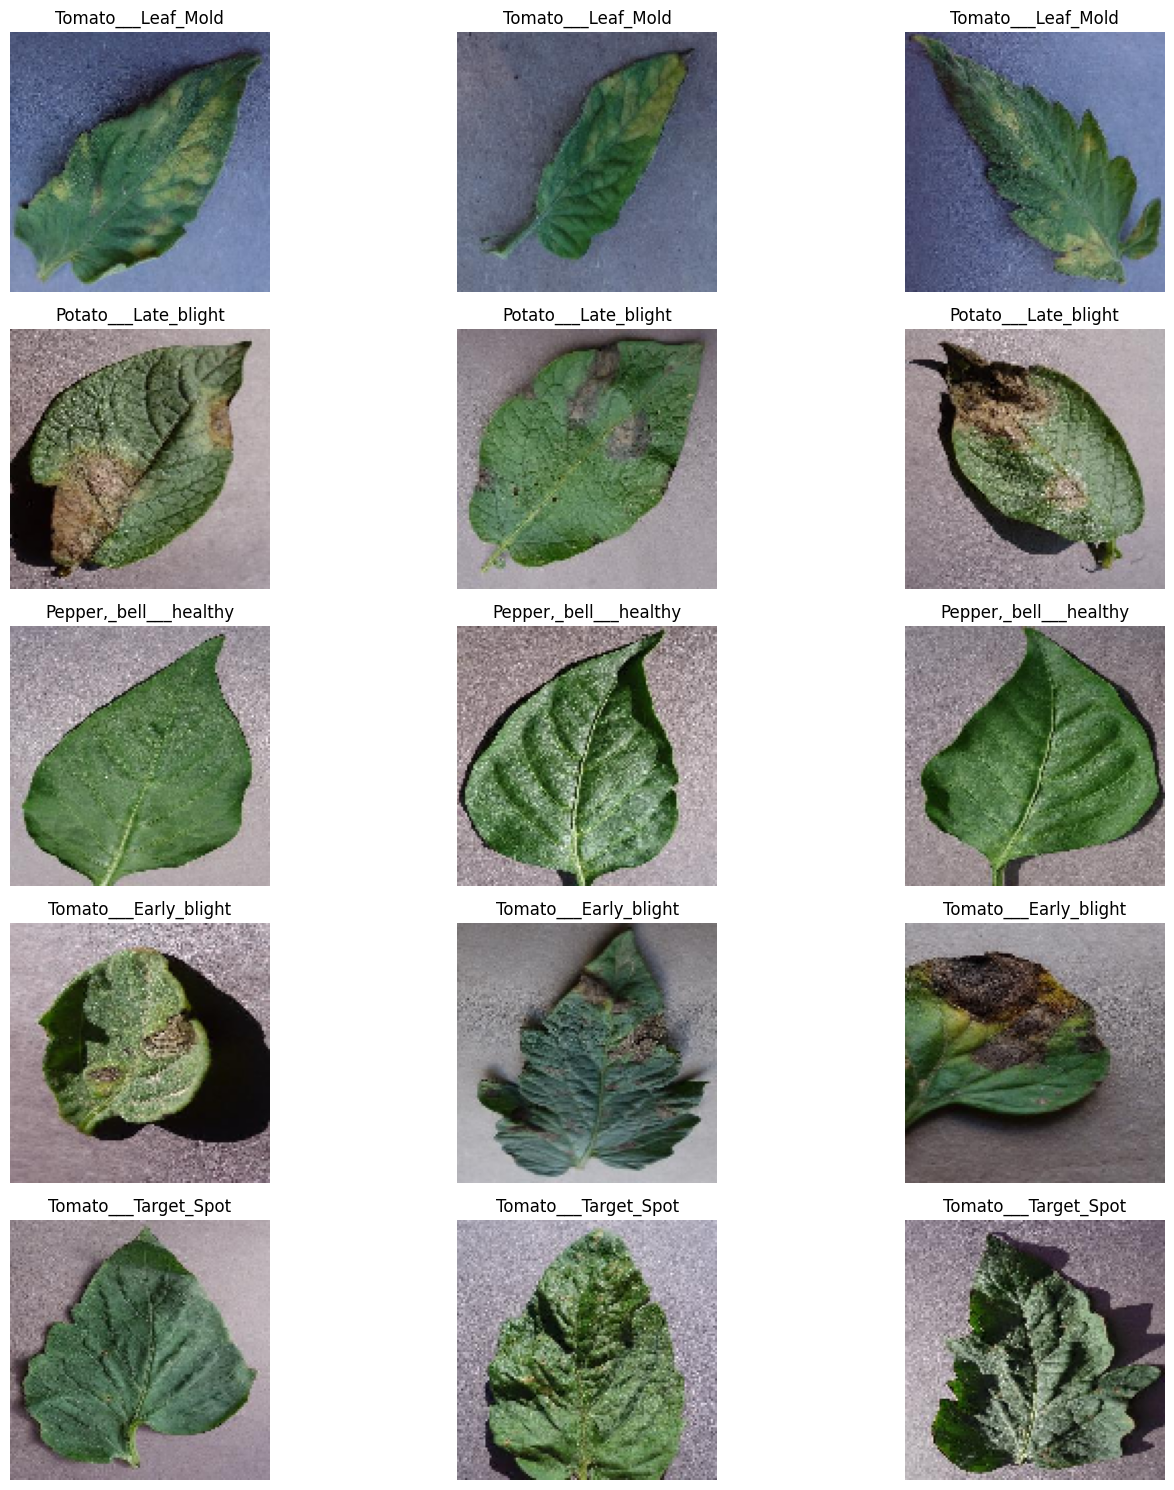

In [ ]:
# Display a few sample images
def display_sample_images(categories, path_color, num_images=3):
    fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 15))
    for i, category in enumerate(categories):
        category_path = os.path.join(path_color, category)
        images = os.listdir(category_path)[:num_images]
        for j, img in enumerate(images):
            img_path = os.path.join(category_path, img)
            img = load_img(img_path, target_size=(128, 128))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(category)

    plt.tight_layout()
    plt.show()

# Show samples from 5 random categories
import random
sample_categories = random.sample(categories, 5)
display_sample_images(sample_categories, path_color)

In [ ]:
avg_sizes = {}
for category in categories:
    widths = []
    heights = []
    category_path = os.path.join(path_color, category)
    for image_file in os.listdir(category_path):
        img_path = os.path.join(category_path, image_file)
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    avg_width = sum(widths) / len(widths) if widths else 0
    avg_height = sum(heights) / len(heights) if heights else 0
    avg_sizes[category] = (avg_width, avg_height)

# Print average sizes
for category, size in avg_sizes.items():
    print(f"{category}: Average size - {size}")

Pepper,_bell___healthy: Average size - (256.0, 256.0)
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: Average size - (256.0, 256.0)
Orange___Haunglongbing_(Citrus_greening): Average size - (256.0, 256.0)
Tomato___Bacterial_spot: Average size - (256.0, 256.0)
Grape___Esca_(Black_Measles): Average size - (256.0, 256.0)
Apple___Black_rot: Average size - (256.0, 256.0)
Tomato___healthy: Average size - (256.0, 256.0)
Peach___Bacterial_spot: Average size - (256.0, 256.0)
Tomato___Tomato_mosaic_virus: Average size - (256.0, 256.0)
Cherry_(including_sour)___healthy: Average size - (256.0, 256.0)
Tomato___Tomato_Yellow_Leaf_Curl_Virus: Average size - (256.0, 256.0)
Cherry_(including_sour)___Powdery_mildew: Average size - (256.0, 256.0)
Blueberry___healthy: Average size - (256.0, 256.0)
Potato___Late_blight: Average size - (256.0, 256.0)
Tomato___Spider_mites Two-spotted_spider_mite: Average size - (256.0, 256.0)
Raspberry___healthy: Average size - (256.0, 256.0)
Peach___healthy: Average siz

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

In [ ]:
train_generator = datagen.flow_from_directory(
    path_color,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 43456 images belonging to 38 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    path_color,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10849 images belonging to 38 classes.


In [ ]:
from tensorflow.keras import Input

model = models.Sequential([
    Input(shape=(128, 128, 3)),  # Use Input layer to define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(38, activation='softmax')  # 38 categories for classification
])


In [ ]:

# model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 286s 210ms/step - accuracy: 0.7049 - loss: 0.9445 - val_accuracy: 0.7877 - val_loss: 0.6771
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 286s 210ms/step - accuracy: 0.8030 - loss: 0.6246 - val_accuracy: 0.8619 - val_loss: 0.4382
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 285s 209ms/step - accuracy: 0.8513 - loss: 0.4660 - val_accuracy: 0.8330 - val_loss: 0.5322
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 316s 205ms/step - accuracy: 0.8796 - loss: 0.3727 - val_accuracy: 0.8822 - val_loss: 0.3649
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 324s 206ms/step - accuracy: 0.8898 - loss: 0.3331 - val_accuracy: 0.9058 - val_loss: 0.2875
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 279s 204ms/step - accuracy: 0.9057 - loss: 0.2842 - val_accuracy: 0.8858 - val_loss: 0.3528
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 278s 204ms/step - accuracy: 0.9128 - loss: 0.2641 - val_accuracy: 0.9112 - val_loss: 0.2757
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 278s 204ms/step - ac

In [22]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_generator)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

340/340 ━━━━━━━━━━━━━━━━━━━━ 55s 163ms/step - accuracy: 0.9227 - loss: 0.2317
Validation Loss: 0.22532963752746582
Validation Accuracy: 0.9259839653968811


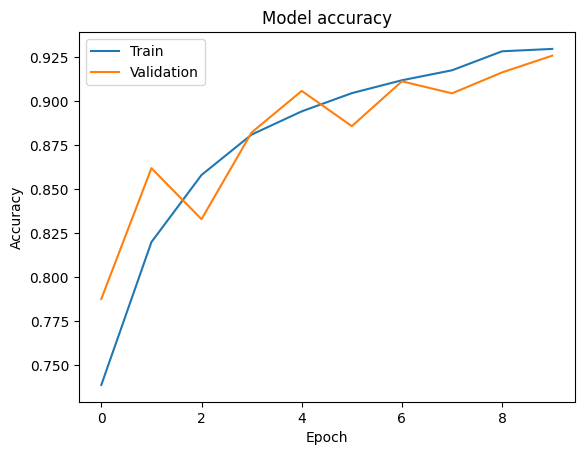

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


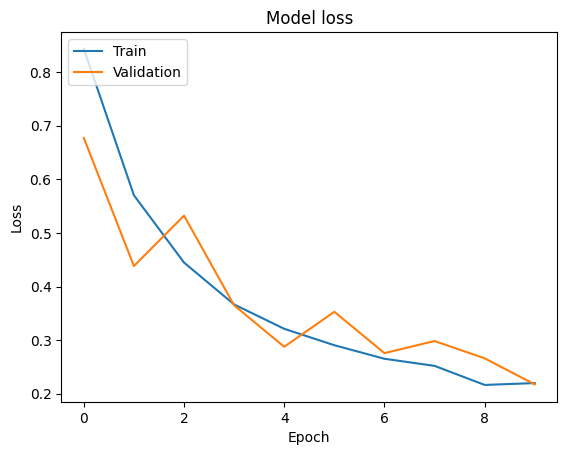

In [24]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [26]:
# Load the ResNet50 model with pre-trained weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [27]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [28]:
# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add global average pooling
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(38, activation='softmax')(x)  # Final output layer with 38 categories


In [29]:
# Build the model
model_resnet = Model(inputs=base_model.input, outputs=predictions)

In [30]:
# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
# Summary of the model
model_resnet.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,854,886 (91.00 MB)

 Trainable params: 267,174 (1.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
history_resnet = model_resnet.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 318s 224ms/step - accuracy: 0.1084 - loss: 3.3884 - val_accuracy: 0.1621 - val_loss: 3.1555
Epoch 2/30
 315/1358 ━━━━━━━━━━━━━━━━━━━━ 3:05 178ms/step - accuracy: 0.1531 - loss: 3.1968